# Рубежный контроль№2

## Задача 2. Кластеризация данных.
## Щипицина К.В., ИУ5-63, 18 вариант
Кластеризуйте данные с помощью двух алгоритмов кластеризации: K-Means (k-means++) и Birch

Датасет: Human Resources Data Set


In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('HRDataset_v13.csv')

In [3]:
data.shape

(401, 35)

In [4]:
data.isnull().sum()

Employee_Name                  91
EmpID                          91
MarriedID                      91
MaritalStatusID                91
GenderID                       91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceSco

In [5]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [6]:
X=data[['Sex']+['MaritalStatusID']+['State']+['CitizenDesc']+['RaceDesc']+['PayRate']+['EmpSatisfaction']]

In [7]:
X.isnull().sum()

Sex                91
MaritalStatusID    91
State              91
CitizenDesc        91
RaceDesc           91
PayRate            91
EmpSatisfaction    91
dtype: int64

In [8]:
X = X.dropna(axis=0, how='any')
X.head()

,Sex,MaritalStatusID,State,CitizenDesc,RaceDesc,PayRate,EmpSatisfaction
0,F,1.0,MA,US Citizen,Black or African American,28.50,2.0
1,M,2.0,MA,US Citizen,Black or African American,23.00,4.0
2,M,0.0,MA,US Citizen,White,29.00,5.0
3,F,1.0,MA,US Citizen,White,21.50,3.0
4,F,0.0,MA,US Citizen,White,16.56,3.0


In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
le=LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['State'] = le.fit_transform(X['State'])
X['CitizenDesc'] = le.fit_transform(X['CitizenDesc'])
X['RaceDesc'] = le.fit_transform(X['RaceDesc'])

## Метод k-средних

In [11]:
from sklearn.cluster import KMeans, MiniBatchKMeans

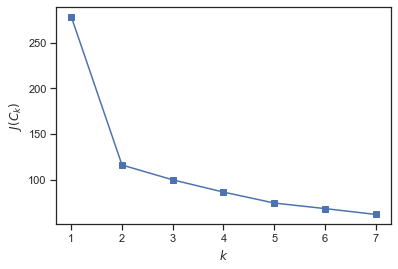

In [12]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

 В качетве метрики будем использовать коэффициент силуэта, с помощью него и подберем оптимальное число кластеров. 

In [13]:
inertia = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1).fit_predict(X) 
    inertia.append((silhouette_score(X, kmeans),k))
inertia


[(0.7380615040862827, 2),
 (0.6084511461387053, 3),
 (0.40455128346858993, 4),
 (0.41838895087451533, 5),
 (0.4151866679903934, 6),
 (0.3924365501133599, 7),
 (0.3502801708911232, 8),
 (0.3627861780580994, 9),
 (0.36993304013047024, 10),
 (0.37266268875882474, 11),
 (0.32698520926742275, 12),
 (0.33034554787641723, 13),
 (0.3383912074254178, 14)]

Выбеерем число кластеров = 2

In [14]:
%time result_KMeans_2 =  KMeans(n_clusters=2, init='k-means++').fit_predict(X)

Wall time: 19.9 ms


In [15]:
silhouette_score(X, result_KMeans_2)

0.7380615040862827

## Алгоритм BIRCH

In [16]:
from sklearn.cluster import Birch

In [17]:
result_Birch = Birch().fit_predict(X)
silhouette_score(X, result_Birch)

0.6083619701690008

In [18]:
%time result_Birch = Birch(n_clusters=2).fit_predict(X)

Wall time: 19.9 ms


In [19]:
silhouette_score(X, result_Birch)

0.7270481761231067

Значение метрики чуть больше у метода k-средних.